## Gradient Boosting Machines (GBM)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[['League','Division','NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64')
X = pd.concat([X_,dms[['League_N','Division_W','NewLeague_N']]],axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                y,
                                                test_size=0.25,
                                                random_state=42)

### Model & Tahmin

In [4]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [5]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

351.0515414408404

### Model Tuning

In [6]:
gbm_params = {"learning_rate": [0.001,0.1,0.01],
             "max_depth":[3,5,8],
             "n_estimators":[100,200,500],
              "subsample": [1,0.5,0.8],
             "loss":["ls","lad","quantile"]}

In [7]:
gbm_model = GradientBoostingRegressor().fit(X_train, y_train)

In [8]:
gbm_cv_model = GridSearchCV(gbm_model,
                            gbm_params,
                            cv= 10,
                            n_jobs=-1,
                            verbose = 2).fit(X_train, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  4.0min finished


In [9]:
gbm_cv_model.best_params_

{'learning_rate': 0.1,
 'loss': 'lad',
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.8}

In [10]:
gbm_tuned = gbm_model = GradientBoostingRegressor(learning_rate=0.1,
                                                 loss = "lad",
                                                 max_depth = 3,
                                                 n_estimators=200,
                                                 subsample=1).fit(X_train, y_train)

In [12]:
y_pred=gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

340.7881849325363

In [13]:
#Degişken Önem Düzeyi

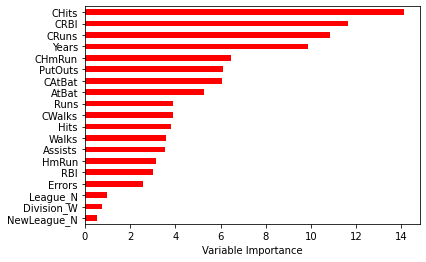

In [15]:
Importance = pd.DataFrame({'Importance':gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by= 'Importance',
                      axis = 0,
                      ascending = True).plot(kind= 'barh',
                                             color = 'r',)
plt.xlabel('Variable Importance')
plt.gca().legend_=None
